In [1]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint, EarlyStopping

Using TensorFlow backend.


In [2]:
df=pd.read_csv("C:/Users/DELL/Downloads/TSLA.csv")
print('Number of rows ad columns:',df.shape)
df.head()

Number of rows ad columns: (252, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-07-12,239.750000,245.380005,239.710007,245.080002,245.080002,9200500
1,2019-07-15,248.000000,254.419998,244.860001,253.500000,253.500000,11000100
2,2019-07-16,249.300003,253.529999,247.929993,252.380005,252.380005,8149000
3,2019-07-17,255.669998,258.309998,253.350006,254.860001,254.860001,9764700
4,2019-07-18,255.050003,255.750000,251.889999,253.539993,253.539993,4764500


In [3]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)

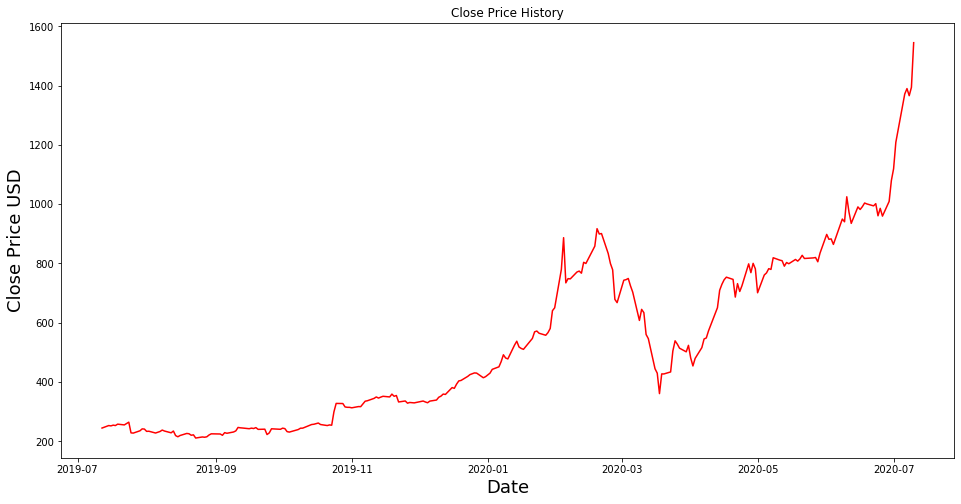

In [4]:
#plotting the data
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'], color='red')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD', fontsize = 18)
plt.show()

In [5]:
# create a new data frame with only 'Close column'
data = df.filter(['Close'])
dataset = data.values #convert the data frame to a numpy array
training_data_len = math.ceil(len(dataset)*.8)  # number of rows to train the model on
training_data_len

202

In [6]:
#scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.02526158],
       [0.03157698],
       [0.03073693],
       [0.03259704],
       [0.03160697],
       [0.03508719],
       [0.03321207],
       [0.0365798 ],
       [0.04011251],
       [0.01306583],
       [0.01248078],
       [0.01827865],
       [0.02314645],
       [0.02265892],
       [0.01683856],
       [0.01720608],
       [0.0126908 ],
       [0.01451341],
       [0.01651603],
       [0.02017627],
       [0.01770861],
       [0.01320833],
       [0.01770111],
       [0.00616539],
       [0.0031802 ],
       [0.00640541],
       [0.01157323],
       [0.01084568],
       [0.00707295],
       [0.008063  ],
       [0.        ],
       [0.00270017],
       [0.00201013],
       [0.0031427 ],
       [0.00773299],
       [0.01065817],
       [0.01020814],
       [0.00696043],
       [0.01363586],
       [0.01203825],
       [0.01529345],
       [0.01810613],
       [0.02677668],
       [0.02585412],
       [0.02535159],
       [0.02355897],
       [0.02504406],
       [0.024

In [7]:
#create the training dataset
#create the scaled training dataset

train_data = scaled_data[0:training_data_len, :]
#Split the data into x_train, y_train datasets
x_train = []
y_train = []
for i in range(40,len(train_data)):
    x_train.append(train_data[i-40:i, 0])
    y_train.append(train_data[i,0])

In [8]:
#convert the x_train and y_train  to numppy array
X_train,y_train = np.array(X_train), np.array(y_train)
#reshape the data
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(162, 40, 1)

In [9]:
#Buil the LSTM model
model =Sequential()
model.add(LSTM(64,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64, return_sequences= False))
model.add(Dense(32))
model.add(Dense(1))
#Complie the model
model.compile(optimizer='adam', loss='mean_squared_error')
#Train the model
model.fit(x_train,y_train, batch_size=32, epochs=50)

Epoch 1/50
162/162 [==============================] - 3s 19ms/step - loss: 0.0247
Epoch 2/50
162/162 [==============================] - 1s 4ms/step - loss: 0.0136
Epoch 3/50
162/162 [==============================] - 1s 5ms/step - loss: 0.0106
Epoch 4/50
162/162 [==============================] - 1s 5ms/step - loss: 0.0065
Epoch 5/50
162/162 [==============================] - 1s 5ms/step - loss: 0.0055
Epoch 6/50
162/162 [==============================] - 1s 4ms/step - loss: 0.0040
Epoch 7/50
162/162 [==============================] - 1s 4ms/step - loss: 0.0039
Epoch 8/50
162/162 [==============================] - 1s 5ms/step - loss: 0.0037
Epoch 9/50
162/162 [==============================] - 1s 5ms/step - loss: 0.0033
Epoch 10/50
162/162 [==============================] - 1s 5ms/step - loss: 0.0035
Epoch 11/50
162/162 [==============================] - 1s 5ms/step - loss: 0.0030
Epoch 12/50
162/162 [==============================] - 1s 5ms/step - loss: 0.0028
Epoch 13/50
162/162 [===

In [11]:
#create the testing data sets
#create a new array containing scale values from index 1543 to 2003
test_data= scaled_data[training_data_len-40:, :]
#create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(40,len(test_data)):
    x_test.append(test_data[i-40:i,0])
#convert the data to a numpy array
x_test = np.array(x_test)
#reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
x_test.shape

(50, 40, 1)

In [12]:
#predicting the data
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
#get the root mean square error(RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

106.0771972571875

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Unrecognized location 'upper_center'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  if sys.path[0] == '':


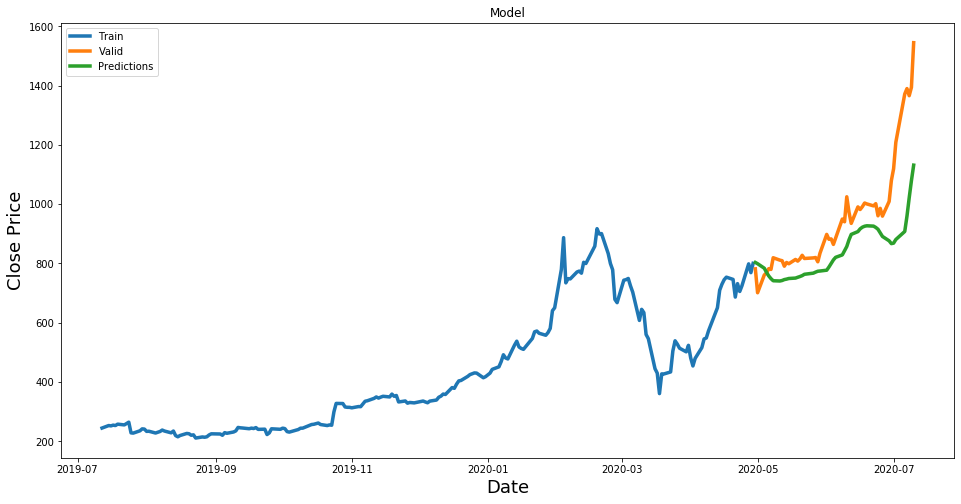

In [13]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visialization the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price' ,fontsize=18)
plt.plot(train['Close'],linewidth=3.5)
plt.plot(valid[['Close','Predictions']],linewidth=3.5)
plt.legend(['Train','Valid','Predictions'], loc='upper_center')

In [14]:
#show the valid and predicted price
valid

,Close,Predictions
Date,,
2020-04-30,781.880005,803.465088
2020-05-01,701.320007,799.289856
2020-05-04,761.190002,784.154907
2020-05-05,768.210022,770.302856
2020-05-06,782.580017,758.140076
2020-05-07,780.039978,748.971802
2020-05-08,819.419983,741.826904
2020-05-11,811.289978,740.965576
2020-05-12,809.409973,742.646606
